### Librerias

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [20]:
# Configurar la visualización de gráficos inline
%matplotlib inline

## Datos

### importacion de CSV

In [21]:
data = pd.read_csv('../datos/brutos/data_EDA.csv')

In [22]:
data.sample(7, random_state = 5)

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
326,326,AD,78.6,Male,20,Not Hisp/Latino,White,0,21,True,"3,3",AD
356,356,LMCI,73.5,Male,16,Not Hisp/Latino,White,0,30,True,"3,3",MCI
84,84,CN,74.1,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",CN
623,623,LMCI,74.4,Female,12,Not Hisp/Latino,White,1,29,True,"3,4",MCI
473,473,LMCI,69.0,Female,8,Not Hisp/Latino,White,1,26,True,"3,4",MCI
99,99,CN,78.3,Female,14,Not Hisp/Latino,White,1,29,True,"3,4",CN
419,419,CN,83.1,Male,14,Not Hisp/Latino,White,0,30,True,"3,3",CN


### Cantidad de variables por tipo de datos

In [23]:
data.dtypes.value_counts()

object     7
int64      4
float64    1
dtype: int64

In [24]:
data.dtypes

Unnamed: 0            int64
DX                   object
AGE                 float64
PTGENDER             object
PTEDUCAT              int64
PTETHCAT             object
PTRACCAT             object
APOE4                 int64
MMSE                  int64
imputed_genotype     object
APOE Genotype        object
DX_SUB               object
dtype: object

In [25]:
data.sample(4, random_state=3)

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
578,578,LMCI,76.2,Male,16,Not Hisp/Latino,White,0,26,True,"3,3",MCI
454,454,LMCI,72.3,Male,17,Not Hisp/Latino,White,0,30,True,"3,3",MCI
131,131,LMCI,79.4,Male,16,Not Hisp/Latino,White,1,30,True,"3,4",MCI
359,359,LMCI,74.0,Male,12,Not Hisp/Latino,White,2,29,True,"4,4",MCI


### Conversion de tipos de datos de las columnas

In [26]:
#Conversion de columnas tipo objeto con menos de 30 variables
data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','APOE Genotype','DX_SUB']] = data[['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','APOE Genotype','DX_SUB']].astype("category")

### Codificación

In [27]:
datos_codificados = pd.DataFrame(data)
#categoricos nominales
# Seleccionar las columnas de tipo object
columnas_nominales =['DX', 'PTGENDER', 'PTETHCAT', 'PTRACCAT', 'imputed_genotype','APOE Genotype','DX_SUB']

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in columnas_nominales:
    encoder = LabelEncoder()
    datos_codificados[column] = encoder.fit_transform(datos_codificados[column])

#Se ordenan por edad
datos_codificados = datos_codificados.sort_values(by="AGE", ascending=False)

In [28]:
datos_codificados.head()

,Unnamed: 0,DX,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB
310,310,1,89.6,0,16,1,2,0,30,1,3,1
90,90,2,89.3,1,13,1,2,0,26,1,3,2
138,138,0,89.1,0,20,1,2,0,26,1,3,0
205,205,2,88.8,1,11,1,2,0,26,1,3,2
407,407,1,88.6,0,20,1,2,0,30,0,3,1


### Escalamiento

In [9]:
# Escalamiento selectivo
scaler = MinMaxScaler()
camaras_datos_escalados = camaras_datos_codificados.copy()
camaras_datos_escalados[['camaras_accesibilidad','camaras_via_nombre','camaras_via_clase','camaras_via_numero','camaras_distrito','camaras_codigo_postal']] = scaler.fit_transform(camaras_datos_codificados[['camaras_accesibilidad','camaras_via_nombre','camaras_via_clase','camaras_via_numero','camaras_distrito','camaras_codigo_postal']])

### Proporcion entre variables categoricas

In [20]:
camaras.dtypes

camaras_pk                         int64
camaras_codigo_postal              int64
camaras_distrito                category
camaras_localidad                 object
camaras_barrio                    object
camaras_via_clase               category
camaras_via_nombre              category
camaras_via_numero               float64
camaras_latitud                  float64
camaras_longitud                 float64
camaras_coordenada_utm_x           int64
camaras_coordenada_utm_y           int64
camaras_accesibilidad              int64
camaras_propietario               object
camaras_propietario_telefono      object
camaras_relevantes_faltantes      object
dtype: object

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_2114/2322446032.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


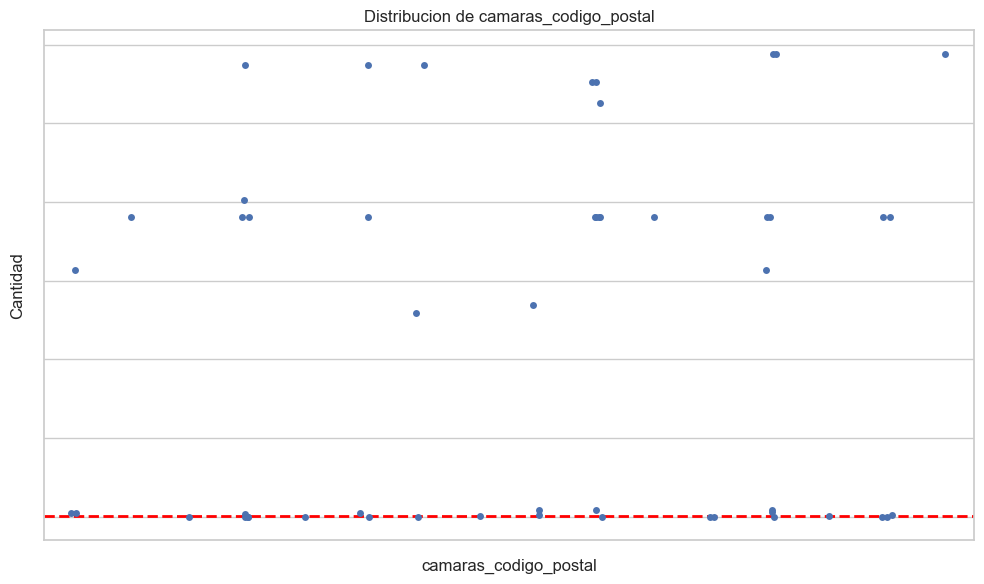

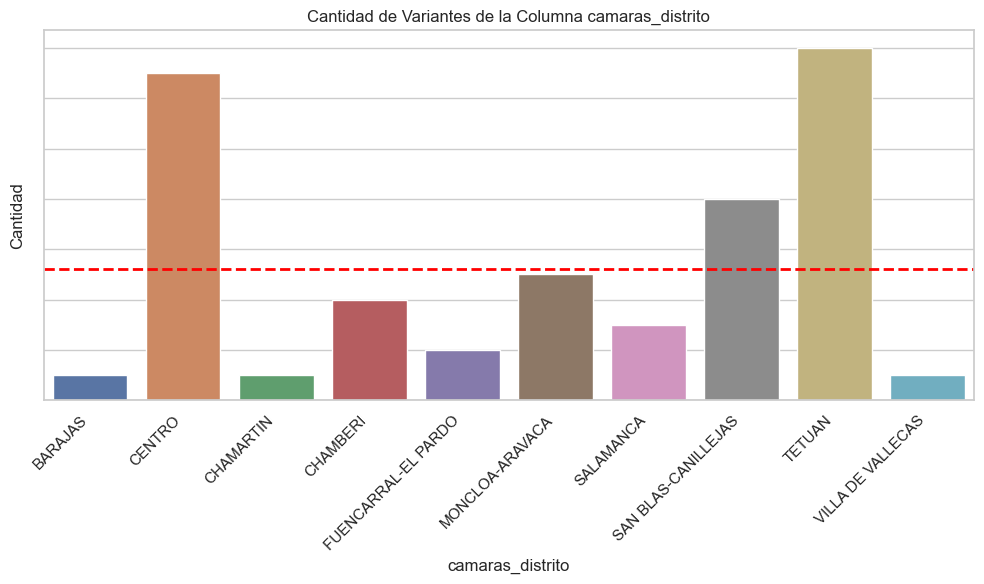

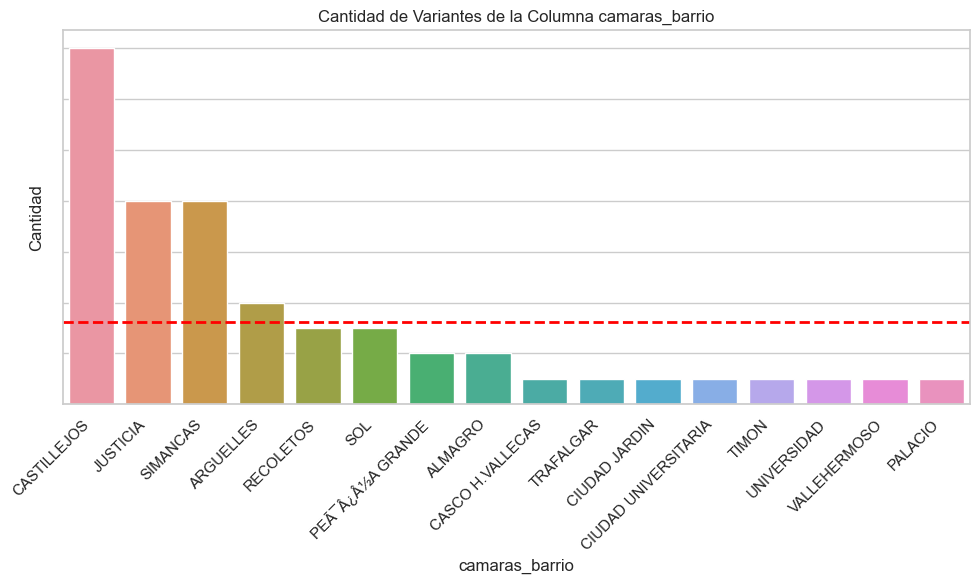

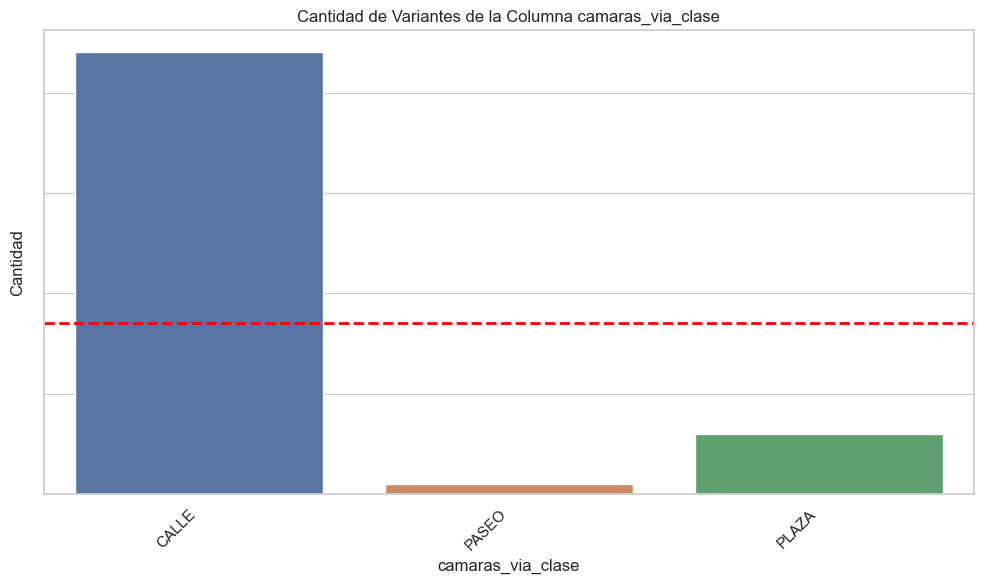

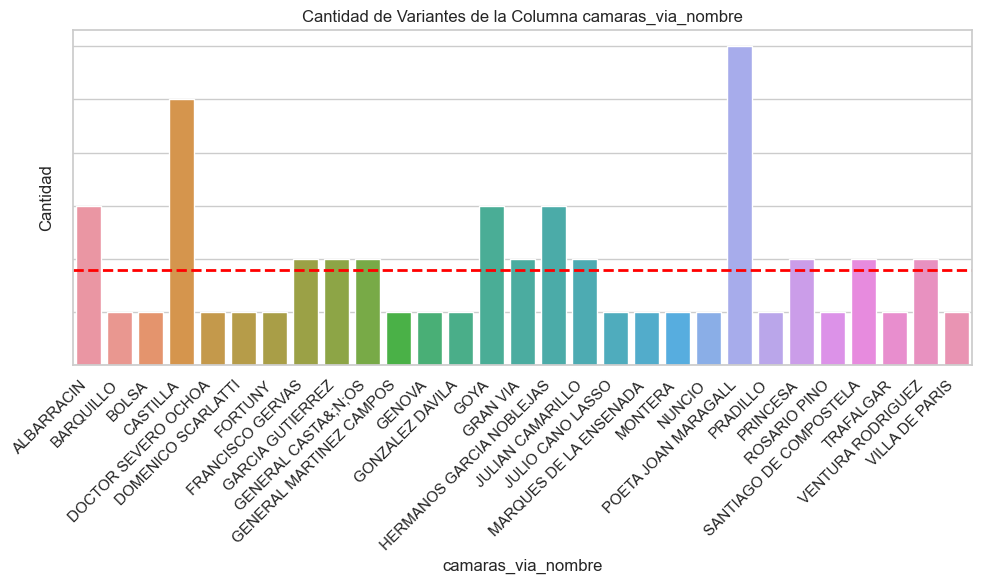

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_2114/2322446032.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


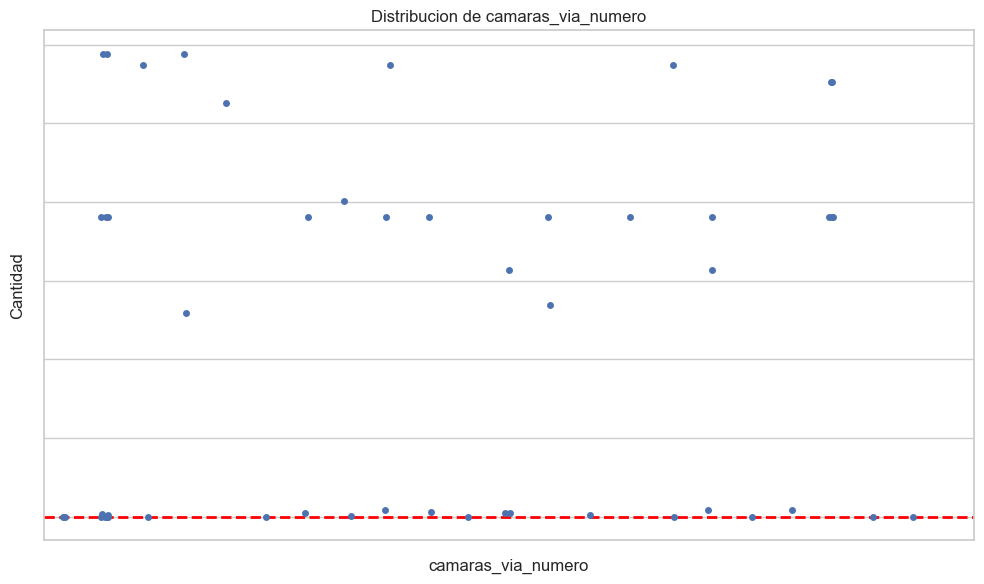

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_2114/2322446032.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


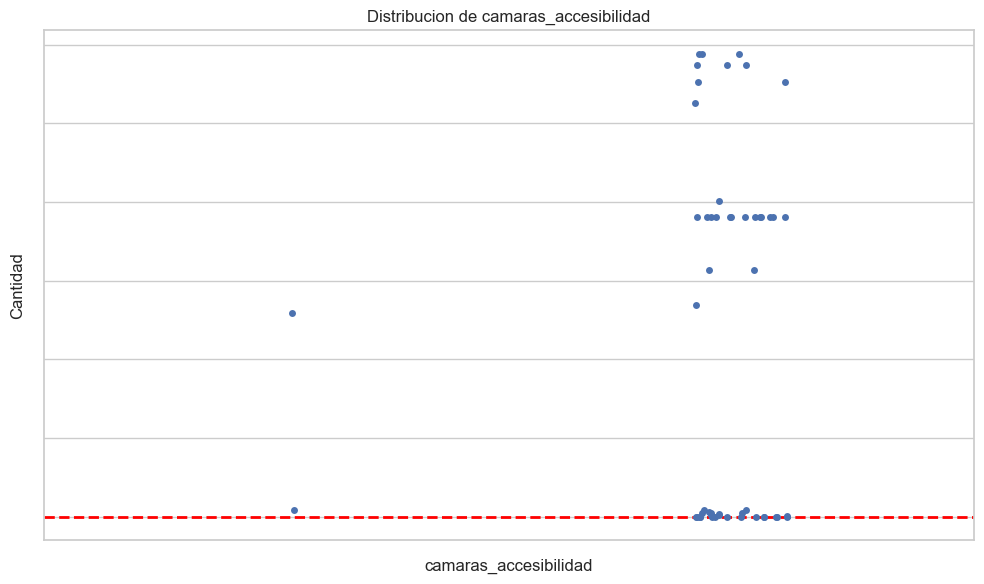

In [22]:
# Lista de columnas a graficar
columnas_graficar = ['camaras_accesibilidad','camaras_via_nombre','camaras_via_clase','camaras_via_numero','camaras_distrito','camaras_barrio','camaras_codigo_postal']

for columna in camaras.columns:
    if columna in columnas_graficar:
        if camaras[columna].dtype == 'object' or str(camaras[columna].dtype) == 'category':
            # Contar las variantes de la columna categórica
            variant_counts = camaras[columna].value_counts()

            # Configurar el estilo del gráfico
            sns.set(style='whitegrid')
            plt.figure(figsize=(10, 6))

            # Crear el gráfico de barras
            ax = sns.barplot(x=variant_counts.index, y=variant_counts.values)

            plt.title(f'Cantidad de Variantes de la Columna {columna}')
            plt.xlabel(columna)
            plt.ylabel('Cantidad')
            # Agregar línea roja en la media de los datos
            valor_media = variant_counts.values.mean()
            ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)

            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_yticklabels([])

        else:
            # Configurar el estilo del gráfico
            sns.set(style='whitegrid')
            plt.figure(figsize=(10, 6))

            # Crear el gráfico de stripplot
            ax = sns.stripplot(data=camaras, x=columna, y='camaras_pk', jitter=True, dodge=True)

            plt.title(f'Distribucion de {columna}')
            plt.xlabel(columna)
            plt.ylabel('Cantidad')  # Eliminar etiquetas del eje y
            #linea de media de los valores
            valor_media = camaras[columna].mean()
            ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)

            # Ajustar etiquetas del eje x y eje y para que sean legibles
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            ax.set_yticklabels([])  # Quitar etiquetas del eje y

        plt.tight_layout()
        plt.show()


### Estadisticas generales

In [23]:
camaras.describe(include=['category', 'object', 'int64', 'float64'])

,camaras_pk,camaras_codigo_postal,camaras_distrito,camaras_localidad,camaras_barrio,camaras_via_clase,camaras_via_nombre,camaras_via_numero,camaras_latitud,camaras_longitud,camaras_coordenada_utm_x,camaras_coordenada_utm_y,camaras_accesibilidad,camaras_propietario,camaras_propietario_telefono,camaras_relevantes_faltantes
count,5.200000e+01,52.000000,52,52,52,51,52,50.000000,52.000000,52.000000,52.000000,5.200000e+01,52.000000,52,34,52
unique,NaN,NaN,10,1,16,3,29,NaN,NaN,NaN,NaN,NaN,NaN,52,32,2
top,NaN,NaN,TETUAN,MADRID,CASTILLEJOS,CALLE,POETA JOAN MARAGALL,NaN,NaN,NaN,NaN,NaN,NaN,ARCHIVO JUDICIAL TERRITORIAL DE LA COMUNIDAD D...,914937124,COMPLETO
freq,NaN,NaN,14,52,14,44,6,NaN,NaN,NaN,NaN,NaN,NaN,1,2,51
mean,4.491175e+06,28020.384615,NaN,NaN,NaN,NaN,NaN,18.960000,40.439863,-3.684805,442171.000000,4.477068e+06,2.884615,NaN,NaN,NaN
std,4.578263e+06,15.926490,NaN,NaN,NaN,NaN,NaN,23.424181,0.021333,0.028720,2435.896702,2.561118e+03,0.582552,NaN,NaN,NaN
min,5.400000e+02,28001.000000,NaN,NaN,NaN,NaN,NaN,0.000000,40.375418,-3.724579,438551.000000,4.469623e+06,0.000000,NaN,NaN,NaN
25%,7.433500e+03,28004.750000,NaN,NaN,NaN,NaN,NaN,1.500000,40.424999,-3.701043,441086.500000,4.475164e+06,3.000000,NaN,NaN,NaN
50%,5.281838e+06,28020.000000,NaN,NaN,NaN,NaN,NaN,10.000000,40.433367,-3.691778,441371.500000,4.476126e+06,3.000000,NaN,NaN,NaN
75%,7.612848e+06,28037.000000,NaN,NaN,NaN,NaN,NaN,27.000000,40.463537,-3.684936,441898.000000,4.479437e+06,3.000000,NaN,NaN,NaN


### Correlacion

In [24]:
matriz_correlacion_camaras = camaras_datos_escalados[['camaras_accesibilidad','camaras_via_nombre','camaras_via_clase','camaras_via_numero','camaras_distrito','camaras_codigo_postal']].corr()

NameError: name 'camaras_datos_escalados' is not defined

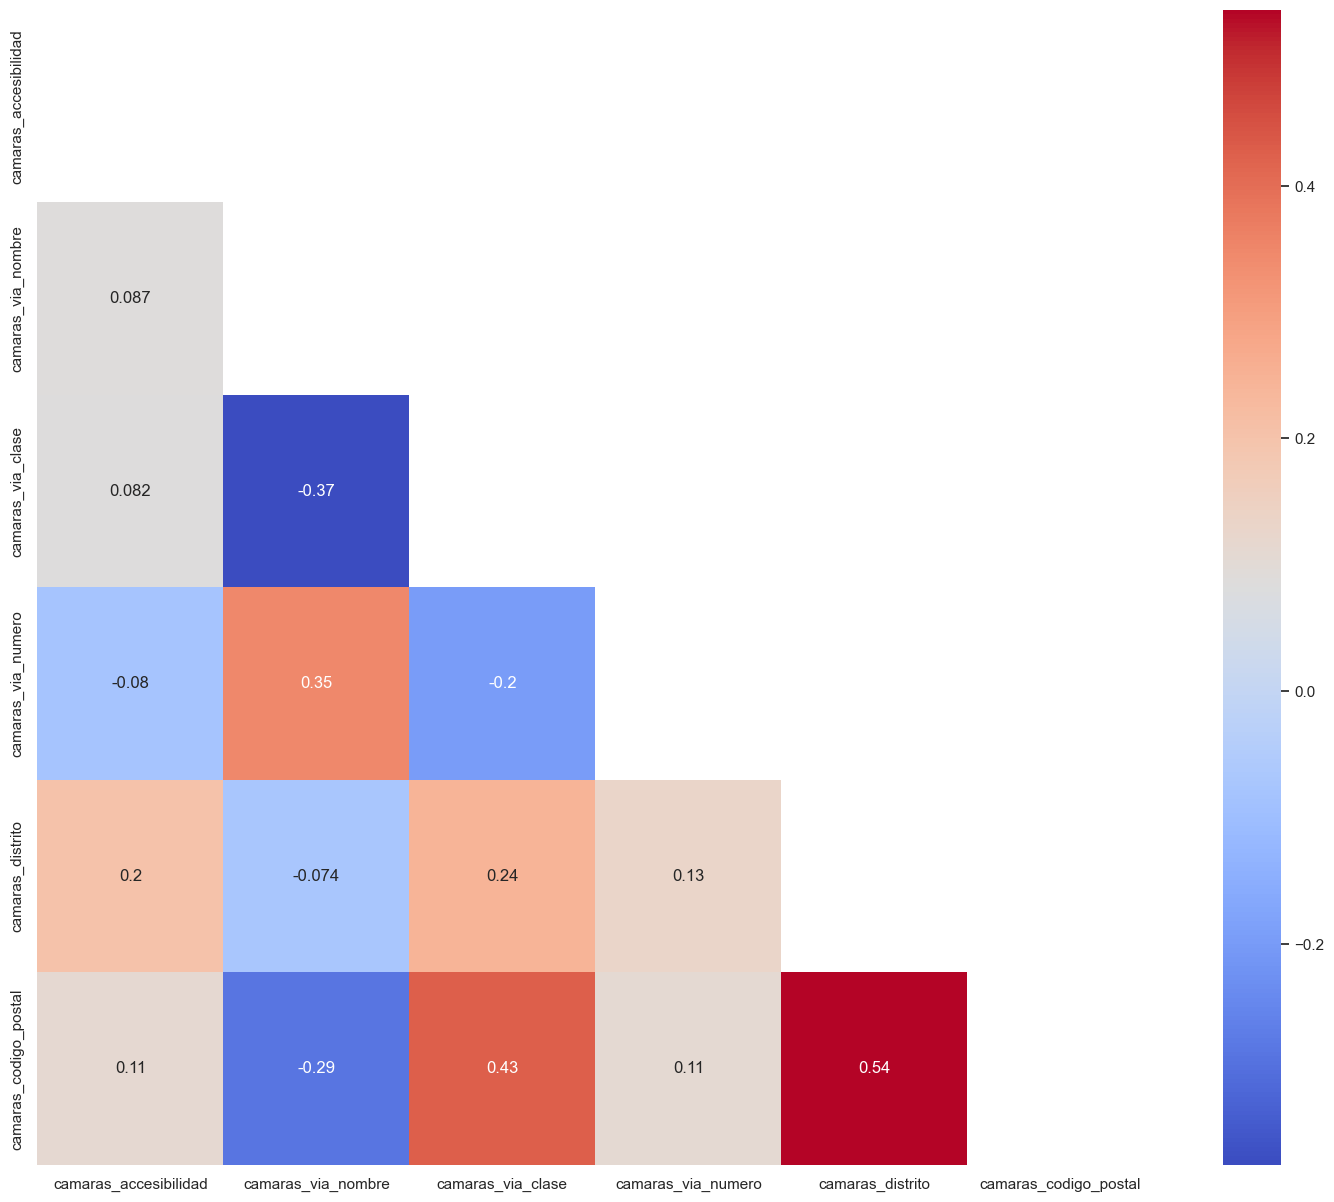

In [13]:
mask = np.triu(np.ones_like(matriz_correlacion_camaras, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(18, 15))
sns.heatmap(matriz_correlacion_camaras, mask=mask, annot=True, cmap='coolwarm')
plt.show()

### Guardado de CSV

In [ ]:
camaras.to_csv('../datos/procesados/2022_madrid_camaras.csv', index=True)
camaras_datos_escalados.to_csv('../datos/procesados/2022_madrid_camaras_datos_escalados.csv', index=True)

## Accidentes

### Importacion de CSV

In [ ]:
#desde colab
# Subir el archivo CSV desde tu sistema local
uploaded = files.upload()

# Leer el archivo CSV en un DataFrame
nombre_archivo = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido
accidentes = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]))

In [26]:
accidentes = pd.read_csv('../datos/procesados/2022_madrid_accidentalidad.csv')

In [27]:
accidentes.sample(5, random_state=4)

,ï»¿num_expediente,accidentes_numero_expediente,accidentes_hora,accidentes_distrito,accidentes_via_tipo,accidentes_via_nombre,accidentes_via_numero,accidentes_coordenada_utm_x,accidentes_coordenada_utm_y,accidentes_relevantes_faltantes
13418,2022S010673,NaN,16,LATINA,ESPACIO VERDE,JESUITAS,19,"437972,335","4473561,647",COMPLETO
45480,2022S040415,NaN,19,VICALVARO,CALLE,TIENDA CHINA MR. CASA,4,"449680,541","4472715,536",COMPLETO
18836,2022S015840,NaN,12,RETIRO,CARRETERA,M-30,800,"443740,972","4473619,097",COMPLETO
23052,2022S019713,NaN,15,MORATALAZ,CALLE,JOSE BERGAMIN,68,"446480,08","4473547,629",COMPLETO
32884,2022S027636,NaN,17,CHAMBERI,AVENIDA,FILIPINAS,18,"439758,169","4476838,161",COMPLETO


### Cantidad de variables por tipo de datos

In [19]:
accidentes.dtypes.value_counts()

int64     8
object    4
Name: count, dtype: int64

### Proporcion entre variables categoricas

In [20]:
# Crear los rangos y las etiquetas
labels = ["{0} - {1}".format(i, i+20) for i in range(0, 540, 20)]

# Corrección en el rango para pd.cut()
accidentes['accidentes_via_numero_grupo'] = pd.cut(accidentes['accidentes_via_numero'], range(0, 541, 20), right=False, labels=labels)

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_6415/1663407250.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')


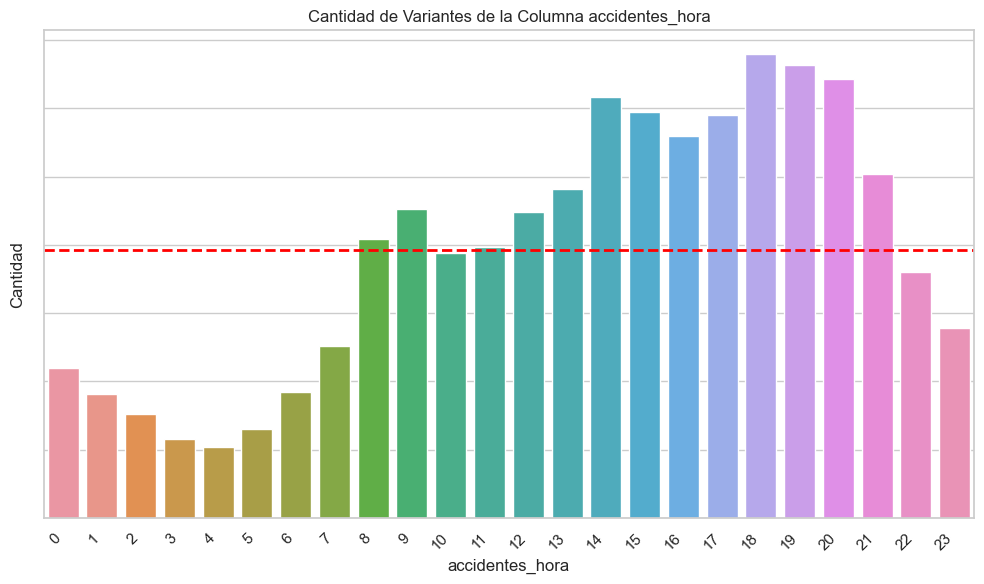

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_6415/1663407250.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')


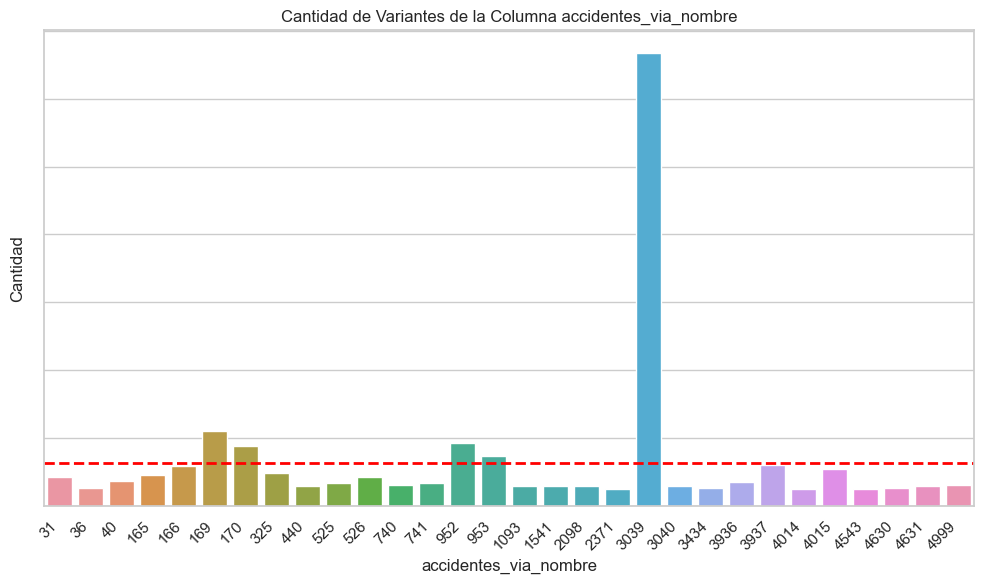

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_6415/1663407250.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')


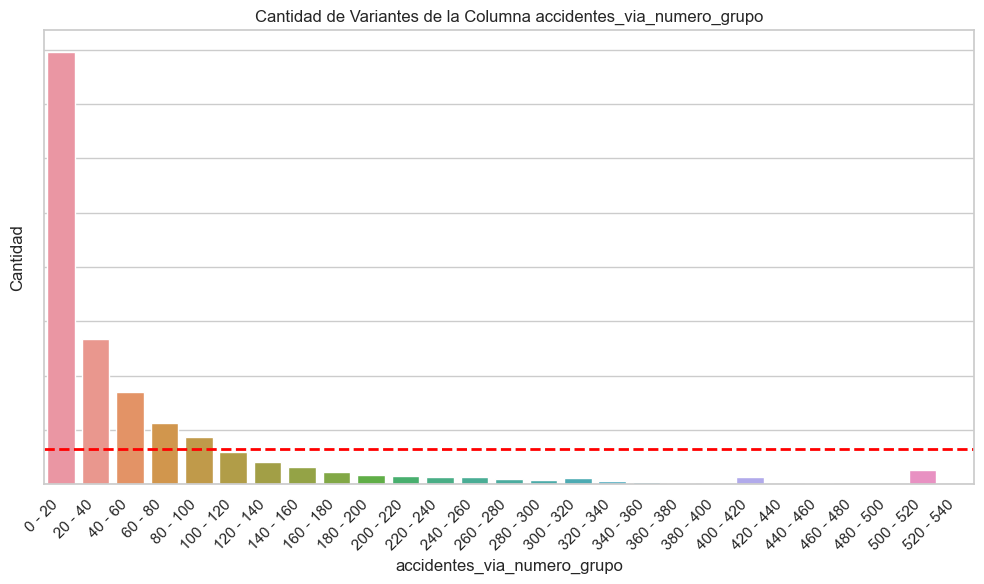

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_6415/1663407250.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')


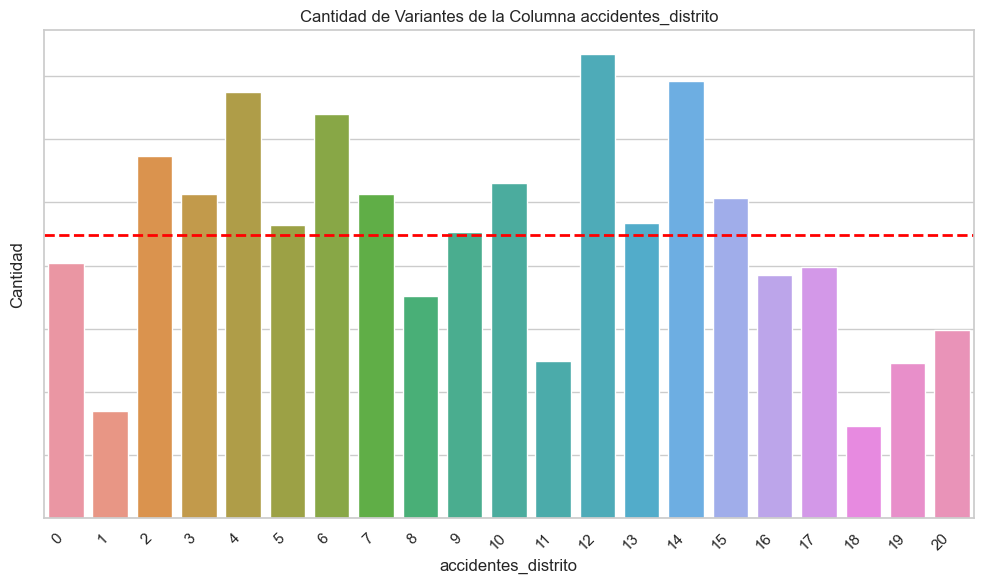

In [21]:
columnas_graficar = ['accidentes_hora', 'accidentes_via_nombre', 'accidentes_via_numero_grupo', 'accidentes_via_tipo', 'accidentes_distrito']

hora_categoria = accidentes['accidentes_hora'].value_counts()
nombre_via_top_treinta = accidentes['accidentes_via_nombre'].value_counts().head(30) #Solo los 30 con mas valores
numero = accidentes['accidentes_via_numero_grupo'].value_counts()
tipo_via = accidentes['accidentes_via_tipo'].value_counts()
distrito = accidentes['accidentes_distrito'].value_counts()

diccionario = {'accidentes_hora': hora_categoria,
               'accidentes_via_nombre': nombre_via_top_treinta,
               'accidentes_via_numero_grupo': numero,
               'accidentes_via_clase': tipo_via,
               'accidentes_distrito': distrito}

for columna in diccionario.keys():
    if columna in columnas_graficar:
        sns.set(style='whitegrid')
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=diccionario[columna].index, y=diccionario[columna].values)
        plt.title(f'Cantidad de Variantes de la Columna {columna}')
        plt.xlabel(columna)
        plt.ylabel('Cantidad')
        valor_media = diccionario[columna].values.mean()  # Corrección aquí
        ax.axhline(valor_media, color='red', linestyle='dashed', linewidth=2)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


### Codificacion

In [22]:
accidentes_datos_codificados = pd.DataFrame(accidentes)
#categoricos nominales
# Seleccionar las columnas de tipo object
columnas_nominales =['accidentes_via_nombre', 'accidentes_via_tipo', 'accidentes_distrito', 'accidentes_via_numero_grupo']

# Iterar sobre las columnas seleccionadas y aplicar la codificación
for column in columnas_nominales:
    encoder = LabelEncoder()
    accidentes_datos_codificados[column] = encoder.fit_transform(accidentes_datos_codificados[column])

#Se ordenan por distrito
accidentes_datos_codificados = accidentes_datos_codificados.sort_values(by="accidentes_distrito", ascending=False)

### Escalamiento

In [23]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47053 entries, 0 to 47052
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Unnamed: 0.1                     47053 non-null  int64   
 1   Unnamed: 0                       47053 non-null  int64   
 2   accidentes_numero_expediente     47053 non-null  object  
 3   accidentes_hora                  47053 non-null  int64   
 4   accidentes_distrito              47053 non-null  int64   
 5   accidentes_via_tipo              47053 non-null  int64   
 6   accidentes_via_nombre            47053 non-null  int64   
 7   accidentes_via_numero            47053 non-null  int64   
 8   accidentes_coordenada_utm_x      47053 non-null  object  
 9   accidentes_coordenada_utm_y      47053 non-null  object  
 10  accidentes_relevantes_faltantes  47053 non-null  object  
 11  accidentes_via_numero_grupo      43459 non-null  category
dtypes: c

In [31]:
# Escalamiento selectivo
scaler = MinMaxScaler()
accidentes_datos_escalados = accidentes_datos_codificados.copy()
accidentes_datos_escalados[['accidentes_hora','accidentes_via_nombre','accidentes_via_numero_grupo','accidentes_via_tipo','accidentes_distrito']] = scaler.fit_transform(accidentes_datos_escalados[['accidentes_hora','accidentes_via_nombre','accidentes_via_numero_grupo','accidentes_via_tipo','accidentes_distrito']])

### Estadisticas basicas

In [25]:
accidentes.describe(include=['object','int64', 'int32', 'category'])

,Unnamed: 0.1,Unnamed: 0,accidentes_numero_expediente,accidentes_hora,accidentes_distrito,accidentes_via_tipo,accidentes_via_nombre,accidentes_via_numero,accidentes_coordenada_utm_x,accidentes_coordenada_utm_y,accidentes_relevantes_faltantes,accidentes_via_numero_grupo
count,47053.000000,47053.000000,47053,47053.000000,47053.000000,47053.000000,47053.000000,47053.000000,47053,47053,47053,43459
unique,NaN,NaN,20212,NaN,NaN,NaN,NaN,NaN,19517,19939,2,27
top,NaN,NaN,2022S002867,NaN,NaN,NaN,NaN,NaN,"438909,004","4476421,943",COMPLETO,0 - 20
freq,NaN,NaN,36,NaN,NaN,NaN,NaN,NaN,36,36,47019,19899
mean,23526.000000,23526.000000,NaN,13.943702,9.415680,1.574756,2487.500712,173.518012,NaN,NaN,NaN,NaN
std,13583.175445,13583.175445,NaN,5.850750,5.540456,1.715123,1517.619227,782.712528,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,11763.000000,11763.000000,NaN,10.000000,5.000000,1.000000,1093.000000,6.000000,NaN,NaN,NaN,NaN
50%,23526.000000,23526.000000,NaN,15.000000,9.000000,1.000000,2617.000000,29.000000,NaN,NaN,NaN,NaN
75%,35289.000000,35289.000000,NaN,19.000000,14.000000,2.000000,3741.000000,93.000000,NaN,NaN,NaN,NaN


### Correlacion

In [ ]:
accidentes_matriz_correlacion = accidentes_datos_escalados.corr()

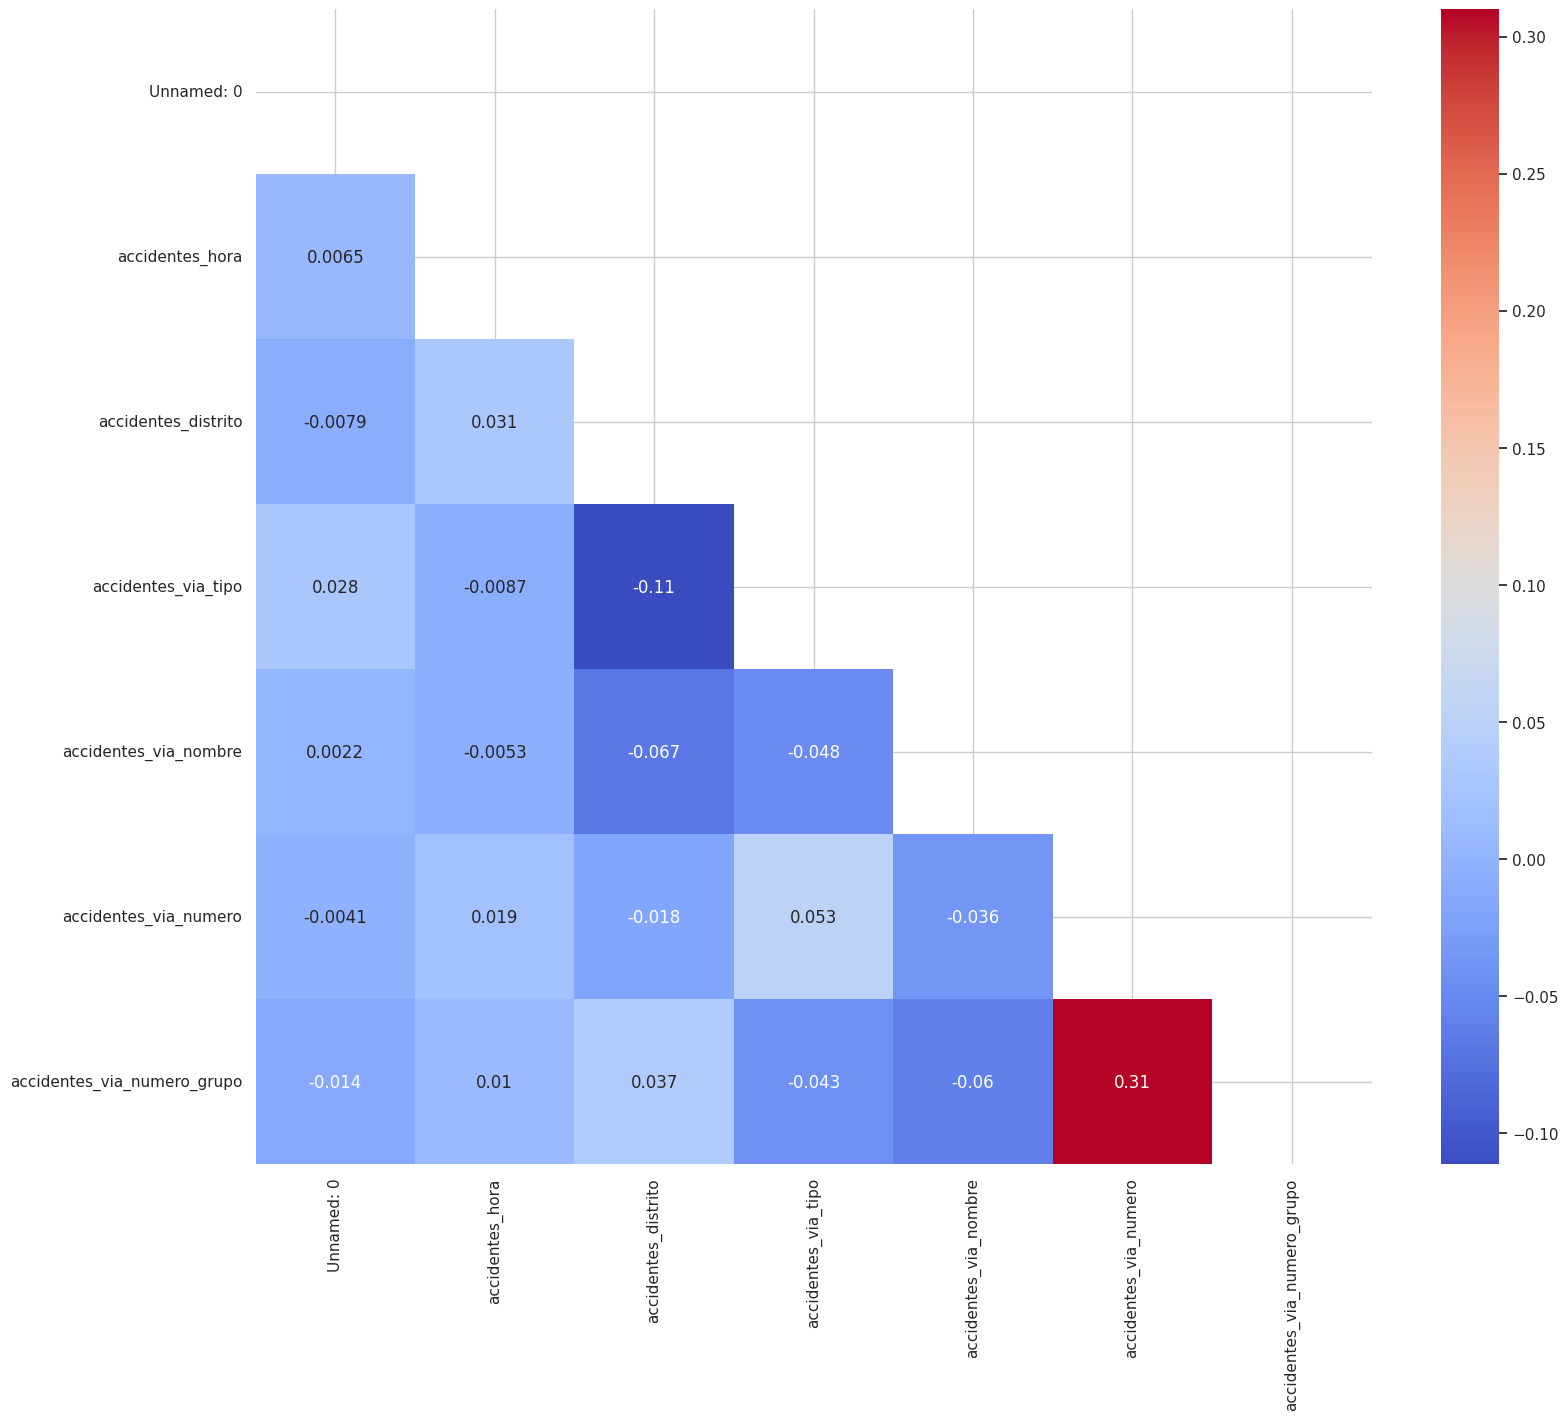

In [59]:
mask = np.triu(np.ones_like(accidentes_matriz_correlacion, dtype=bool))
# Crear el mapa de calor con la mitad de la matriz
plt.figure(figsize=(18, 15))
sns.heatmap(accidentes_matriz_correlacion, mask=mask, annot=True, cmap='coolwarm')
plt.show()

### Guardado de CSV

In [32]:
accidentes.to_csv('../datos/procesados/2022_madrid_accidentalidad.csv', index = True)
accidentes_datos_escalados.to_csv('../datos/procesados/2022_madrid_accidentalidad_escalados.csv', index = True)